# Motion of a particle - Newtonian approach

> Renato Naville Watanabe, Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab)  
> Federal University of ABC, Brazil

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Study-of-motion" data-toc-modified-id="Study-of-motion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Study of motion</a></span></li><li><span><a href="#The-development-of-the-laws-of-motion-of-bodies" data-toc-modified-id="The-development-of-the-laws-of-motion-of-bodies-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The development of the laws of motion of bodies</a></span></li><li><span><a href="#Newton's-laws-of-motion" data-toc-modified-id="Newton's-laws-of-motion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Newton's laws of motion</a></span></li><li><span><a href="#Fundamental-concepts" data-toc-modified-id="Fundamental-concepts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fundamental concepts</a></span><ul class="toc-item"><li><span><a href="#Linear-momentum" data-toc-modified-id="Linear-momentum-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear momentum</a></span></li><li><span><a href="#Impulse" data-toc-modified-id="Impulse-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Impulse</a></span></li><li><span><a href="#Force" data-toc-modified-id="Force-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Force</a></span></li><li><span><a href="#Work" data-toc-modified-id="Work-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Work</a></span></li><li><span><a href="#Mechanical-energy" data-toc-modified-id="Mechanical-energy-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Mechanical energy</a></span><ul class="toc-item"><li><span><a href="#Kinetic-energy" data-toc-modified-id="Kinetic-energy-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Kinetic energy</a></span></li><li><span><a href="#Potential-energy" data-toc-modified-id="Potential-energy-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Potential energy</a></span></li><li><span><a href="#Power" data-toc-modified-id="Power-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Power</a></span></li></ul></li><li><span><a href="#Angular-momentum" data-toc-modified-id="Angular-momentum-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Angular momentum</a></span></li><li><span><a href="#Torque-(moment-of-force)" data-toc-modified-id="Torque-(moment-of-force)-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Torque (moment of force)</a></span></li><li><span><a href="#Mechanical-energy-for-angular-motion" data-toc-modified-id="Mechanical-energy-for-angular-motion-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Mechanical energy for angular motion</a></span><ul class="toc-item"><li><span><a href="#Kinetic-energy" data-toc-modified-id="Kinetic-energy-5.8.1"><span class="toc-item-num">5.8.1&nbsp;&nbsp;</span>Kinetic energy</a></span></li><li><span><a href="#Work" data-toc-modified-id="Work-5.8.2"><span class="toc-item-num">5.8.2&nbsp;&nbsp;</span>Work</a></span></li><li><span><a href="#Power" data-toc-modified-id="Power-5.8.3"><span class="toc-item-num">5.8.3&nbsp;&nbsp;</span>Power</a></span></li></ul></li></ul></li><li><span><a href="#Principles-of-conservation" data-toc-modified-id="Principles-of-conservation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Principles of conservation</a></span><ul class="toc-item"><li><span><a href="#Principle-of-conservation-of-linear-momentum" data-toc-modified-id="Principle-of-conservation-of-linear-momentum-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Principle of conservation of linear momentum</a></span></li><li><span><a href="#Principle-of-conservation-of-angular-momentum" data-toc-modified-id="Principle-of-conservation-of-angular-momentum-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Principle of conservation of angular momentum</a></span></li><li><span><a href="#Principle-of-conservation-of-mechanical-energy" data-toc-modified-id="Principle-of-conservation-of-mechanical-energy-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Principle of conservation of mechanical energy</a></span><ul class="toc-item"><li><span><a href="#Conservative-forces" data-toc-modified-id="Conservative-forces-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Conservative forces</a></span></li></ul></li></ul></li><li><span><a href="#Steps-to-find-the-motion-of-a-particle" data-toc-modified-id="Steps-to-find-the-motion-of-a-particle-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Steps to find the motion of a particle</a></span><ul class="toc-item"><li><span><a href="#Example-1:-Ball-kicked-into-the-air" data-toc-modified-id="Example-1:-Ball-kicked-into-the-air-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Example 1: Ball kicked into the air</a></span><ul class="toc-item"><li><span><a href="#Analytical-solution" data-toc-modified-id="Analytical-solution-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Analytical solution</a></span><ul class="toc-item"><li><span><a href="#Plot" data-toc-modified-id="Plot-7.1.1.1"><span class="toc-item-num">7.1.1.1&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Numerical-solution" data-toc-modified-id="Numerical-solution-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Numerical solution</a></span><ul class="toc-item"><li><span><a href="#Plot" data-toc-modified-id="Plot-7.1.2.1"><span class="toc-item-num">7.1.2.1&nbsp;&nbsp;</span>Plot</a></span></li></ul></li></ul></li><li><span><a href="#Example-2:-Ball-kicked-into-the-air-considering-the-air-drag" data-toc-modified-id="Example-2:-Ball-kicked-into-the-air-considering-the-air-drag-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Example 2: Ball kicked into the air considering the air drag</a></span><ul class="toc-item"><li><span><a href="#Analytical-solution" data-toc-modified-id="Analytical-solution-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Analytical solution</a></span><ul class="toc-item"><li><span><a href="#Plot" data-toc-modified-id="Plot-7.2.1.1"><span class="toc-item-num">7.2.1.1&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Numerical-solution" data-toc-modified-id="Numerical-solution-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Numerical solution</a></span><ul class="toc-item"><li><span><a href="#Plot" data-toc-modified-id="Plot-7.2.2.1"><span class="toc-item-num">7.2.2.1&nbsp;&nbsp;</span>Plot</a></span></li></ul></li></ul></li><li><span><a href="#Example-3:-Ball-kicked-into-the-air-considering-the-air-drag-proportional-to-square-of-speed" data-toc-modified-id="Example-3:-Ball-kicked-into-the-air-considering-the-air-drag-proportional-to-square-of-speed-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Example 3: Ball kicked into the air considering the air drag proportional to square of speed</a></span><ul class="toc-item"><li><span><a href="#All-numerical-solutions-plotted-together" data-toc-modified-id="All-numerical-solutions-plotted-together-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>All numerical solutions plotted together</a></span></li></ul></li></ul></li><li><span><a href="#Further-reading" data-toc-modified-id="Further-reading-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Further reading</a></span></li><li><span><a href="#Video-lectures-on-the-internet" data-toc-modified-id="Video-lectures-on-the-internet-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Video lectures on the internet</a></span></li><li><span><a href="#Problems" data-toc-modified-id="Problems-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Problems</a></span></li><li><span><a href="#References" data-toc-modified-id="References-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Python setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook', font_scale=1.2)

## Study of motion

In Mechanics we are interested in the study of motion (including deformation) and forces (and the relation between them) of anything in nature.  

As a good rule of thumb, we model the phenomenon of interest as simple as possible, with just enough complexity to understand the phenomenon. 

For example, we could model a person jumping as a particle (the center of gravity, with no size) moving in one direction (the vertical) if all we want is to estimate the jump height and relate that to the external forces to the human body. So, mechanics of a particle might be all we need.  

However, if the person jumps and performs a somersault, to understand this last part of the motion we have to model the human body as one of more objects which displaces and rotates in two or three dimensions. In this case, we would need what is called mechanics of rigid bodies.

If, besides the gross motions of the segments of the body, we are interested in understanding the deformation in the the human body segments and tissues, now we would have to describe the mechanical behavior of the body (e.g., how it deforms) under the action of forces. In this case we would have to include some constitutive laws describing the mechanical properties of the body.

Choosing the necessary complexity of the model (because we want the simplest sufficient model), or even which model, is usually not trivial in Engineering. To paraphrase an older quote, selecting the right model is more than half the solution to a problem. Perhaps the challenge we face is best quantified with the following quote from Einstein:  
> "If I had an hour to solve a problem and my life depended on the solution, I would spend the first 55 minutes determining the appropriate **model** to ask... because as soon as I know the appropriate **model**, I could solve the problem in less than five minutes."

Where we take the liberty of replacing the word 'question' with 'model'.

Let's start with the study of the forces and motion in Mechanics looking at the motion of a particle using the Newtonian approach.

## The development of the laws of motion of bodies  

"The theoretical development of the laws of motion of bodies is a problem of such interest and importance that it has engaged the attention of all the most eminent mathematicians since the invention of dynamics as a mathematical science by Galileo, and especially since the wonderful extension which was given to that science by Newton."

&#8212; Hamilton, 1834 (apud Taylor, 2005).  

## Newton's laws of motion

The Newton's laws of motion describe the relationship between the forces acting on a body and the resultant linear motion due to those forces:

- **First law**: An object will remain at rest or in uniform motion in a straight line unless an external force acts on the body.
- **Second law**: The acceleration of an object is directly proportional to the net force acting on the object and inversely proportional to the mass of the object: $\vec{F} = m \vec{a}$.
- **Third law**: Whenever an object exerts a force $\vec{F}_1$ (action) on a second object, this second object simultaneously exerts a force $\vec{F}_2$ on the first object with the same magnitude but opposite direction (reaction): $\vec{F}_2 = −\vec{F}_1.$

These three statements are astonishing in their simplicity and how much of knowledge they empower.   
Isaac Newton was born in 1943 and his works that resulted in these equations and other discoveries were mostly done in the years of 1666 and 1667, when he was only 24 years old!  

Here are these three laws in Newton's own words (from page 83 of Book I in the first American edition of the [*Philosophiæ Naturalis Principia Mathematica*](http://archive.org/details/newtonspmathema00newtrich):

> LAW I.    
> *Every body perseveres in its state of rest, or of uniform motion in a right line, unless it is compelled to change that state by forces impressed thereon.*   
> LAW II.    
> *The alteration of motion is ever proportional to the motive force impressed; and is made in the direction of the right line in which that force is impressed.*   
> LAW III.   
> *To every action there is always opposed an equal reaction: or the mutual actions of two bodies upon each other are always equal, and directed to contrary parts.*   

And Newton carefully defined mass, motion, and force in the first page of the book I (page 73 of the [*Principia*](http://archive.org/details/newtonspmathema00newtrich)):  

> DEFINITION I.   
> *The quantity of matter is the measure of the same, arising from its density and bulk conjunctly.*   
> ...It is this quantity that I mean hereafter everywhere under the name of body or mass.   
> DEFINITION II.   
> *The quantity of motion is the measure of the same, arising from the velocity and quantity of matter conjunctly.*    
> The motion of the whole is the sum of the motions of all the parts; and therefore in a body double in quantity, with equal velocity, the motion is double; with twice the velocity, it is quadruple.   
> DEFINITION IV.   
> *An impressed force is an action exerted upon a body, in order to change its state, either of rest, or of moving uniformly forward in a right line.*

## Fundamental concepts

### Linear momentum

From Definition II above, we can see that Newton defined as motion what we know today as linear momentum, the product between mass and velocity:

$$ \vec{p} = m\vec{v} $$

So, in his second law, *alteration of motion is ever proportional to the motive force impressed*, if we understand that it was implicit that the *alteration* occurs in a certain time (or we can understand *force impressed* as force during a certain  time), Newton actually stated:

$$ \vec{F} = \frac{\Delta\vec{p}}{\Delta t} \;\;\;\;\;\; \text{or}\;\;\;\;\;\; \vec{F}\Delta t = \Delta\vec{p}$$

What is equivalent to $\vec{F} = m\vec{a} \; $ if mass is constant.

### Impulse

The mechanical linear impulse is a related concept and it can be derived from the second law of motion:

$$ \vec{Imp} = \vec{F}\Delta t = m\Delta\vec{v} $$

And if the force varies with time:

$$ \vec{Imp} = \sum_t \vec{F}(t)\Delta t $$

or using [infinitesimal calculus](http://en.wikipedia.org/wiki/Infinitesimal_calculus) (that it was independently developed by Newton himself and Leibniz):

$$ \vec{Imp} = \int_t \vec{F}(t)dt $$

The concept of impulse due to a force that varies with time is often applied in biomechanics because it is common to measure forces (for example, with force plates) during human movement.  
When such varying force is measured, the impulse can be calculated as the area under the force-versus-time curve:

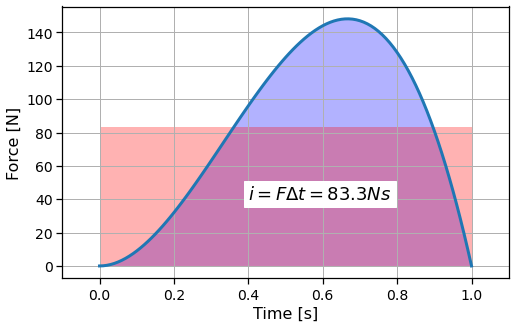

In [2]:
# simulate some data:
t = np.arange(0, 1.01, 0.01)
f = 1000*(-t**3+t**2)
# plot:
plt.rc('axes',  labelsize=16) 
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
hfig, hax = plt.subplots(1,1, figsize=(8,5))
hax.plot(t, f, linewidth=3)
hax.set_xlim(-.1, 1.1)
hax.grid()
hax.set_ylabel('Force [N]')
hax.set_xlabel('Time [s]')
plt.fill(t, f, 'b', alpha=0.3)
# area (impulse) with the trapz numerical integration method:
from scipy.integrate import trapz
imp = trapz(f, t)
# plot a rectangle for the mean impulse value:
plt.fill(np.array([t[0], t[0], t[-1], t[-1]]),
         np.array([0, imp, imp, 0]/(t[-1]-t[0])), 'r', alpha=0.3)
s = '$i=F\Delta t = %.1f Ns$'%imp 
plt.text(.4, 40, s, fontsize=18,
         bbox=dict(facecolor='white', edgecolor='white'));

### Force

There are many manifestations of force we may experience during movement: gravitational, friction, ground reaction force, muscle force, buoyancy, elastic force, and other less visible such as electromagnetic, nuclear, etc. But in reality, all these different forces can be grouped in only four fundamental forces:

- Strong force: hold the nucleus of an atom together. Range of action is $10^{-15}$ m. 
- Weak force: force acting between particles of the nucleus. Range of action is $10^{-18}$ m.
- Electromagnetic force: forces between electrical charges and the magnetic forces.
- Gravity force: forces between masses; is the weakest of the four fundamental forces.

In mechanics, forces can be classified as either contact or body forces. The contact force acts at the point of contact between two bodies. The body force acts on the entire body with no contact (e.g., gravity and electromagnetic forces).   
In biomechanics, another useful classification is to divide the forces in either external or internal in relation to the human body. External forces result from interactions with an external body or environment (e.g., gravity and ground reaction forces). Internal forces result from interactions inside the body (e.g., the forces between bones).

### Work

The mechanical work of a force done on a body is the product between the component of the force in the direction of the resultant motion and the displacement: 

$$ W = \vec{F} \cdot \Delta\vec{x} $$

Where the symbol $\cdot$ stands for the [scalar product](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ScalarVector.ipynb) mathematical function.

Mechanical work can also be understood as the amount of mechanical energy transferred into or out of a system.

### Mechanical energy

Mechanical energy is the sum of kinetic and potential energies.

#### Kinetic energy

$$ E_k = \frac{1}{2}mv^2 $$

The linear momentum and the kinetic energy are related by:

$$ \vec{p} = \frac{\partial E_k}{\partial\vec{v}} $$

#### Potential energy

The potential energy due to the gravitational force at the Earth's surface is:

$$ E_p = mgh $$

The potential energy stored in a spring is:

$$ E_p = \frac{1}{2}Kx^2 $$

#### Power 
 
$$ P = \frac{\Delta E}{\Delta t} \quad \text{and} \quad P = \vec{F} \cdot \vec{v} $$

### Angular momentum

In analogy to the linear momentum, the angular momentum is the quantity of movement of a particle rotating around an axis at a distance $\vec{r}$:

$$ \vec{L} = \vec{r} \times \vec{p} $$

For a particle rotating around an axis, the angular momentum can be expressed as:

$$ \vec{L} = I \vec{\omega} $$

Where $I$ is the rotational inertia or moment of inertia of the particle around the axis.

### Torque (moment of force)

In analogy to the second Newton's law for the linear case, torque or moment of force (or simply moment) is the time derivative of angular momentum:

$$ \vec{L} = \frac{d\vec{L}}{dt} = \frac{d}{dt}(\vec{r} \times \vec{p}) = \frac{d\vec{r}}{dt} \times \vec{p} + \vec{r} \times \frac{d\vec{p}}{dt} = 0 + \vec{r} \times \vec{F} $$

$$ \vec{M} = \vec{r} \times \vec{F} $$

$$ \vec{M} = (r_x\:\mathbf{\hat{i}}+r_y\:\mathbf{\hat{j}}+r_z\:\mathbf{\hat{k}}) \times  (F_x\:\mathbf{\hat{i}}+F_y\:\mathbf{\hat{j}}+F_z\:\mathbf{\hat{k}}) $$

Where the symbol $\times$ stands for the [cross product](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ScalarVector.ipynb) mathematical function.   
The moment of force can be calculated as the determinant of the following matrix:

$$ \vec{M} = \begin{bmatrix}
\mathbf{\hat{i}} & \mathbf{\hat{j}} & \mathbf{\hat{k}} \\ 
r_x & r_y & r_z \\
F_x & F_y & F_z 
\end{bmatrix} $$

$$ \vec{M} = (r_yF_z-r_zF_y)\mathbf{\hat{i}}+(r_zF_x-r_xF_z)\mathbf{\hat{j}}+(r_xF_y-r_yF_x)\mathbf{\hat{k}} $$

The moment of force can also be calculated by the geometric equivalent formula:

$$ \vec{M} = \vec{r} \times \vec{F} = ||\vec{r}||\:||\vec{F}||\:sin(\theta) $$

Where $\theta$ is the angle between the vectors $\vec{r}$ and $\vec{F}$. 

The animation below (from [Wikipedia](http://en.wikipedia.org/wiki/File:Torque_animation.gif)) illustrates the relationship between force ($\vec{F}$), torque ($\tau$), and momentum vectors ($\mathbf{p}$ and $\vec{L}$):   

<figure><img src="http://upload.wikimedia.org/wikipedia/commons/0/09/Torque_animation.gif" alt="Torque animation" width="300"/><figcaption><center><i>Figure. Relationship between force ($\mathbf{F}$), torque ($\tau$), and momentum vectors ($\mathbf{p}$ and $\mathbf{L}$) (from [Wikipedia](http://en.wikipedia.org/wiki/File:Torque_animation.gif)).</i></center></figcaption></figure>

### Mechanical energy for angular motion
 
#### Kinetic energy
 
$$ E_k = \frac{1}{2}I\omega^2 $$

#### Work
 
$$ W = \vec{M} \cdot \Delta\vec{\theta} $$
 
#### Power
 
$$ P = \frac{\Delta E}{\Delta t} \quad \text{and} \quad P = \vec{M} \cdot \vec{\omega} $$

## Principles of conservation

### Principle of conservation of linear momentum

> *In a closed system with no external forces acting upon it, the total linear momentum of this system is constant.*

### Principle of conservation of angular momentum

> *In a closed system with no external forces acting upon it, the total angular momentum of this system is constant.*

### Principle of conservation of mechanical energy

> *In a closed system with no external forces acting upon it, the mechanical energy of this system is constant if only conservative forces act in this system.*


#### Conservative forces

A force is said to be conservative if this force produces the same work regardless of its trajectory between two points, if not the force is said to be non-conservative. Mathematically, the force $\vec{F}$ is conservative if:

$$ \oint \vec{F} \cdot d\vec{s} = 0 $$

The gravitational force and the elastic force of an ideal spring are examples of conservative forces but friction force is not conservative. The forces generated by our muscles are also not conservative.

## Steps to find the motion of a particle

1. Draw a free body diagram of the particle. Draw all the forces being applied to the particle.  
2. Write the expression of each force applied to the particle. For external forces (for example gravity and air friction) write the constitutive laws of the phenomena.  
3. Write the Newton's second Law $\vec{\bf{F}} = m \vec{\bf{a}}$, where $\vec{\bf{F}}$ is the sum of all forces applied to the particle and $\vec{\bf{a}}$ is the particle acceleration.  
4. Separate the equation into the 3 Cartesian components (or 2 components if the movement is bidimensional).  
5. Solve the differential equations
 1. If possible, solve the differential equations analytically.  
 2. If not possible to solve the differential equations analytically, separate each equation into 2 first order differential equations and use some numerical method (e.g. Euler, Runge-Kutta) to solve the first order differential equations with the aid of a computer.   
6. Use the solution to interpret the situation, or to find some error on your approach.  

Later, we will study in details how to draw a free-body diagram.

Let's see now some examples on how to find the motion of a particle

### Example 1: Ball kicked into the air

#### Analytical solution

A football ball is kicked with an angle of 30 degrees with the ground (horizontal).  
The mass of the ball is 0.43 kg. The initial speed of the ball is 20 m/s and the initial height is 0 m. Consider the gravitational acceleration as 9.81 $m/s^2$ and ignore the air resistance.  
Find the motion of the ball. 

**Solution**:  

We know that:  
<span class="notranslate">
$$ x_0 = 0 m \\ y_0 = 0 m $$  
</span>
As the angle of the initial velocity of the ball with the ground is 30 degrees:  
<span class="notranslate">
$$ v_{x0} = 20 \cos(30^\circ) = 20\frac{\sqrt{3}}{2} = 10\sqrt{3} m/s \\
v_{y0} = 20 \sin(30^\circ) = 20 \frac{1}{2} = 10 m/s $$  
</span>
The free-body diagram of the ball is depicted below:
   
<figure><center><img src="../images/ballGrav.png" alt="free-body diagram of a ball" width="500"/><figcaption><i>Figure. Free-body diagram of a ball under the influence of gravity.</i></figcaption></center></figure>

The only force acting on the ball is the gravitational force:  
<br>
<span class="notranslate">
$$ \vec{F}_g = -mg \; \hat{\bf{j}} $$ 
</span>

So, we apply the Newton's second law:  
<br>
<span class="notranslate">
$$ \vec{F}_g = m \frac{d^2\vec{r}}{dt^2} \quad \rightarrow \quad - mg \; \hat{\bf{j}} = m \frac{d^2\vec{r}}{dt^2} \quad \rightarrow \quad - g \; \hat{\bf{j}} = \frac{d^2\vec{r}}{dt^2} $$
</span>

Now, we can separate the equation in two components (x and y):  
<br>
<span class="notranslate">
$$ 0 = \frac{d^2x}{dt^2} $$
</span>
and
<span class="notranslate">
$$ -g = \frac{d^2y}{dt^2} $$
</span>

These equations can be easily solved analytically by integrating both sides of each equation:  
<br>
<span class="notranslate">
$$ 0 = \frac{d^2x}{dt^2} \quad \rightarrow v_{x0} = \frac{dx}{dt} \quad \rightarrow \quad v_{x0}t + x_{0} = x(t) $$
</span>
and
<span class="notranslate">
$$ -g = \frac{d^2y}{dt^2} \quad \rightarrow - gt + v_{y0} = \frac{dy}{dt} \quad \rightarrow \quad -\frac{g}{2}t^2 +v_{y0}t + y_{0} = y(t) $$
</span>

Given the known initial conditions, the trajectory of the ball along time is:  
<br>
<span class="notranslate">
$$ x(t) = v_{x0}t $$
</span>
and 
<span class="notranslate">
$$ y(t) =  -\frac{g}{2} t^2 + v_{y0}t $$
</span>
or 
<span class="notranslate">
$$ \vec{\bf{r}}(t) =  v_{x0}t \; \hat{\bf{i}} + \left(-\frac{g}{2} t^2 + v_{y0}t \right) \; \hat{\bf{j}} $$
</span>

##### Plot

In [3]:
m   = 0.43           # [kg]
x0  = 0              # [m]
y0  = 0              # [m]
vx0 = 10*np.sqrt(3)  # [m/s]
vy0 = 10             # [m/s]
g   = 9.81           # [m/s^2]

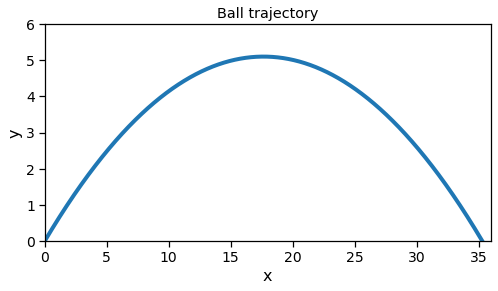

In [4]:
dt = 0.001  # [s]
t  = np.arange(0, 2.05, dt)
x1a = vx0*t
y1a = -g/2*t**2 + vy0*t
plt.figure(figsize=(8, 4))
plt.plot(x1a, y1a, lw=4)
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Numerical solution

We can solve this problem numerically and compare both solutions.

We start from the differential equations of each coordinate, and then break each one into two first-order differential equations:  
<br>
<span class="notranslate">
$$ 0 = \frac{d^2x}{dt^2} $$
</span>
and
<span class="notranslate">
$$ - g = \frac{d^2y}{dt^2} $$
</span>
The first equation can be broken as:
<span class="notranslate">
$$ \frac{dv_x}{dt} = 0 $$
</span>
<span class="notranslate">
$$ \frac{dx}{dt} = v_x(t) $$
</span>
And the second equation can be broken as:
<span class="notranslate">
$$ \frac{dv_y}{dt} = -g $$
</span>
<span class="notranslate">
$$ \frac{dy}{dt} = v_y(t) $$
</span>

You can use any numerical integration method you want (Euler, Runge-Kutta, etc), but here we will use the Euler method. Let's see the solution for the $x(t)$ variable.

The derivative of $x(t)$ is given by:  
<br>
<span class="notranslate">
$$ \frac{dx}{dt} = \lim\limits_{\Delta t \rightarrow 0} \frac{x(t+\Delta t) - x(t)}{\Delta t} $$
</span>

Which can be approximated by:   
<br>
<span class="notranslate">
$$ \frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t} \quad \rightarrow \quad x(t+\Delta t) \approx x(t) + \Delta t \frac{dx}{dt} $$
</span>

So, with the initial conditions of all the variables, we can apply the equation above to find the values of the variables along time (for a revision of Ordinary Differential Equations, see the notebook [Ordinary Differential Equation](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/OrdinaryDifferentialEquation.ipynb)).  
In the cell below, we apply the Euler method for the four first-order differential equations.

In [5]:
x  = x0
y  = y0
vx = vx0
vy = vy0
r  = np.array([x, y])
while y >= 0:
    dxdt = vx            # 1st equation
    x = x + dt * dxdt
    dydt = vy            # 2nd equation
    y = y + dt * dydt
    dvxdt = 0            # 3rd equation
    vx = vx + dt * dvxdt
    dvydt = -g           # 4th equation
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x, y])))

##### Plot

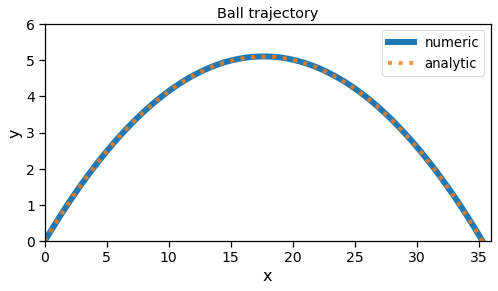

In [6]:
plt.figure(figsize=(8, 4))
x1n = r[:, 0]
y1n = r[:, 1]
plt.plot(x1n, y1n, ls='-', lw=6, alpha=1, label='numeric')
plt.plot(x1a, y1a, ls=':', lw=4, alpha=.8, label='analytic')
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Example 2: Ball kicked into the air considering the air drag

Now, besides the gravity, we consider the drag due to the air resistance ($b$ = 0.006 Ns/m).  
First we will consider the drag force  proportional to the speed and opposite direction to the velocity vector.
       
<figure><center><img src="../images/ballGravLinearRes.png" alt="free-body diagram of the ball" width="500"/><figcaption><i>Figure. Free-body diagram of a ball under the influence of gravity and drag.</i></figcaption></center></figure>

So the forces being applied on the ball are:  
<br>
<span class="notranslate">
$$ \vec{F} = -mg \; \hat{\bf{j}} - b\vec{v} = -mg \; \hat{\bf{j}} - b\frac{d\vec{r}}{dt} = -mg \;  \hat{\bf{j}} - b\left(\frac{dx}{dt} \; \hat{\bf{i}}+\frac{dy}{dt} \; \hat{\bf{j}}\right) = - b\frac{dx}{dt} \; \hat{\bf{i}} - \left(mg + b\frac{dy}{dt}\right) \; \hat{\bf{j}} $$
</span>

Writing down the Newton's second law:  
<br>
<span class="notranslate">
$$ \vec{F} = m \frac{d^2\vec{r}}{dt^2} \quad \rightarrow \quad - b\frac{dx}{dt} \; \hat{\bf{i}} - \left(mg + b\frac{dy}{dt}\right) \; \hat{\bf{j}} = m\left(\frac{d^2x}{dt^2} \; \hat{\bf{i}}+\frac{d^2y}{dt^2} \; \hat{\bf{j}}\right) $$
</span>

Now, we can separate into one equation for each coordinate:  
<br>
<span class="notranslate">
$$ - b\frac{dx}{dt} = m\frac{d^2x}{dt^2} \quad \rightarrow \quad \frac{d^2x}{dt^2} = -\frac{b}{m} \frac{dx}{dt} $$
</span>
<span class="notranslate">
$$ -mg - b\frac{dy}{dt} = m\frac{d^2y}{dt^2} \quad \rightarrow \quad \frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt} - g $$ 
</span>

We can solve these equations analytically, for example, by using Laplace Transform or classical methods to solve linear differential equations.

#### Analytical solution

The solution of a linear differential equation can be found by finding the natural (or homogeneous) solution and the forced (or non-homogeneous) solution and then adding both solutions.

First, we solve the first differential equation ($x$ coordinate). The characteristic polynomial of the equation is:  
<br>
<span class="notranslate">
$$ \lambda^2 + \frac{b}{m}\lambda = 0 $$ 
</span>

The roots of this equation are $\lambda = 0$ and $\lambda = -\frac{b}{m}$, and consequently, its natural modes are:  
<br>
<span class="notranslate">
$$ x_{n_1}(t) = Ae^{0t} = A \\
x_{n_2}(t) = B e^{-\frac{b}{m}t} $$ 
</span>

As there is no external forces in the $x$ direction, there is no forced solution. So, the motion of the ball in the $x$ coordinate is:  
<br>
<span class="notranslate">
$$ x(t) = A + Be^{-\frac{b}{m}t} $$
</span>

To find the values of the $A$ and $B$ constants, we must use the initial conditions $x(0)$ and $v_x(0)$.  
<br>
<span class="notranslate">
$$ x(0) = 0 = A + B $$
</span>
<span class="notranslate">
$$ v_x(0) = v_{x0} = \frac{dx(0)}{dt} = -\frac{Bb}{m}e^{-\frac{b}{m}0} \quad \rightarrow \quad B = -\frac{v_{x0}m}{b} \quad \rightarrow \quad A = \frac{v_{x0}m}{b} $$
</span>  

So:
<span class="notranslate">
$$ x(t) = \frac{v_{x0}m}{b} - \frac{v_{x0}m}{b}e^{-\frac{b}{m}t} = \frac{v_{x0}m}{b}\left(1-e^{-\frac{b}{m}t} \right) $$
</span>

Now, we solve the differential equation for the $y$ coordinate.  
First, we find the natural solution, which comprises the solution from the equation without the gravitational force (the force independent of y(t) and its derivatives), in this case:  
<br>
<span class="notranslate">
$$ \frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt} $$
    
</span>
The solution of this equation is the same from the $x$ coordinate:  
<br>
<span class="notranslate">
$$ y_n(t) = A + Be^{-\frac{b}{m}t} $$
</span>

The forced solution (including the gravitational force, which is constant) happens when every derivative, with the exception of the derivative with the lowest order (in this case order 1 but it could be order 0, i.e. no derivative) goes to zero.  
<br>
<span class="notranslate">
$$\frac{d^2y}{dt^2} \quad = \quad 0 \quad = \quad -\frac{b}{m}\frac{dy_f}{dt} - g \quad \rightarrow \quad \frac{dy_f}{dt} = -\frac{mg}{b} \quad \rightarrow \quad y_f(t) = -\frac{mg}{b}t $$
</span>

The complete solution of the motion of the ball in the $y$ coordinate is the sum of the natural and forced solutions:  
<br>
<span class="notranslate">
$$ y(t) = A + Be^{-\frac{b}{m}t} - \frac{mg}{b}t $$
</span>

To find the values of the constants A and B, we must use the initial conditions $y(0)$ and $v_y(0)$.  
<br>
<span class="notranslate">
$$ y(0) = 0 = A + B $$
</span>
<span class="notranslate">
$$ v_y(0) = v_{y0} = \frac{dy(0)}{dt} = - \frac{Bb}{m} - \frac{mg}{b} \\
B = -\frac{m^2g}{b^2} -\frac{v_{y0}m}{b} \\
A = +\frac{m^2g}{b^2} + \frac{v_{y0}m}{b} $$
</span>

So, the motion of the ball in the y coordinate is:  
<br>
<span class="notranslate">
$$ y(t) = \left(\frac{m^2g}{b^2} + \frac{v_{y0}m}{b}\right) - \left(\frac{m^2g}{b^2} + \frac{v_{y0}m}{b}\right)e^{-\frac{b}{m}t} -\frac{mg}{b}t \\
y(t) = \left(\frac{m^2g}{b^2} + \frac{v_{y0}m}{b}\right)\left(1 - e^{-\frac{b}{m}t}\right) - \frac{mg}{b}t $$
</span>

In [7]:
b = 0.006  # [Ns/m]
t = np.arange(0, 2.05, 0.01)
x2a = vx0*m/b*(1 - np.exp(-b/m*t))
y2a = (vy0*m/b + g*m**2/b**2) * (1 - np.exp(-b/m*t)) - g*m/b*t

##### Plot

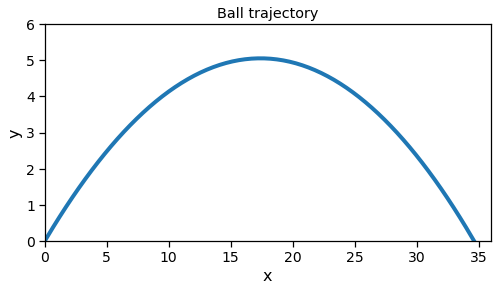

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(x2a, y2a, lw=4)
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Numerical solution

Now, we will solve the same situation using a numerical method (Euler method).  
We start from the equations previously found for each coordinate:  
<br>
<span class="notranslate">
$$ \frac{d^2x}{dt^2} = -\frac{b}{m} \frac{dx}{dt} $$
</span>
<span class="notranslate">
$$ \frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt} - g $$
</span>

We can separate each equation into two first order equations and apply the Euler method:  
<br>
<span class="notranslate">
$$ \frac{dv_x}{dt} = -\frac{b}{m} v_x $$
</span>
<span class="notranslate">
$$ \frac{dx}{dt} = v_x $$
</span>
<span class="notranslate">
$$ \frac{dv_y}{dt} = -\frac{b}{m}v_y - g $$
</span>
<span class="notranslate">
$$ \frac{dy}{dt} = v_y $$
</span>

In [9]:
x  = x0
y  = y0
vx = vx0
vy = vy0
r  = np.array([x, y])
while y >= 0:
    dxdt = vx
    x = x + dt * dxdt
    dydt = vy
    y = y + dt * dydt
    dvxdt = -b/m*vx
    vx = vx + dt * dvxdt
    dvydt = -g - b/m*vy
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x, y])))

##### Plot

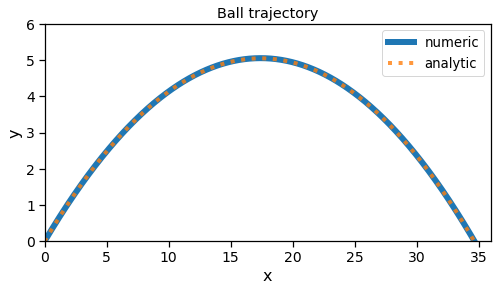

In [10]:
plt.figure(figsize=(8, 4))
x2n = r[:, 0]
y2n = r[:, 1]
plt.plot(x2n, y2n, ls='-', lw=6, alpha=1, label='numeric')
plt.plot(x2a, y2a, ls=':', lw=4, alpha=.8, label='analytic')
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Example 3: Ball kicked into the air considering the air drag proportional to square of speed

Now, we will consider the drag force due to the air resistance proportional to the square of speed and still in the opposite direction of the velocity vector. 
           
<figure><center><img src="../images/ballGravSquareRes.png" alt="free-body diagram of the ball" width="500"/><figcaption><i>Figure. Free-body diagram of a ball under the influence of gravity and drag proportional to the square of speed.</i></figcaption></center></figure>

So the forces being applied on the ball are (for a revision of Time-varying frames and the meaning of the $\hat{\bf{e_t}}$, see [Time-varying frames notebook](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/Time-varying%20frames.ipynb)):  
<br>
<span class="notranslate">
$$ \vec{F} = -mg \; \hat{\bf{j}} - bv^2\hat{\bf{e_t}} \\
\vec{F} = -mg \; \hat{\bf{j}} - b (v_x^2+v_y^2) \frac{v_x \; \hat{\bf{i}} + v_y \; \hat{\bf{j}}}{\sqrt{v_x^2+v_y^2}} \\
\vec{F} = -mg \; \hat{\bf{j}} - b \sqrt{v_x^2+v_y^2} \,(v_x \; \hat{\bf{i}}+v_y \; \hat{\bf{j}}) \\
\vec{F} = -mg \; \hat{\bf{j}} - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\left(\frac{dx}{dt} \hat{\bf{i}} + \frac{dy}{dt} \; \hat{\bf{j}}\right) $$
</span>  

Writing down the Newton's second law:  
<br>
<span class="notranslate">
$$ \vec{F} = m \frac{d^2\vec{r}}{dt^2} \\
-mg \; \hat{\bf{j}} - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\left(\frac{dx}{dt} \hat{\bf{i}}+\frac{dy}{dt}\hat{\bf{j}}\right) = m\left(\frac{d^2x}{dt^2}\hat{\bf{i}}+\frac{d^2y}{dt^2}\hat{\bf{j}}\right) $$
</span>  

Now, we can separate into one equation for each coordinate:  
<br>
<span class="notranslate">
$$ - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dx}{dt} = m\frac{d^2x}{dt^2} \quad \rightarrow \\
\frac{d^2x}{dt^2} = - \frac{b}{m} \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dx}{dt} $$
</span>
<span class="notranslate">
$$ -mg - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dy}{dt} = m\frac{d^2y}{dt^2} \quad \rightarrow \\
\frac{d^2y}{dt^2} = - \frac{b}{m} \sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dy}{dt} \right)^2} \,\frac{dy}{dt} -g $$
</span>  

These equations are very difficult to solve analytically, but they can be easily  solved by using numerical methods. Below we  will use the same numerical method (Euler method) to solve these equations.  
For that, again we must break each equation into two first-order differential equations:  
<br>
<span class="notranslate">
$$ \frac{dv_x}{dt} = - \frac{b}{m} \sqrt{v_x^2+v_y^2} \,v_x $$
</span>
<span class="notranslate">
$$ \frac{dx}{dt} = v_x $$
</span>
<span class="notranslate">
$$ \frac{dv_y}{dt} = - \frac{b}{m} \sqrt{v_x^2+v_y^2} \,v_y -g $$
</span>
<span class="notranslate">
$$ \frac{dy}{dt} = v_y $$
</span>  

Now, we can apply the Euler method to find a solution. 

In [11]:
x  = x0
y  = y0
vx = vx0
vy = vy0
r  = np.array([x, y])
while y >= 0:
    dxdt = vx
    x = x + dt * dxdt
    dydt = vy
    y = y + dt * dydt
    dvxdt = -b/m * np.sqrt(vx**2 + vy**2)*vx
    vx = vx + dt * dvxdt
    dvydt = -b/m * np.sqrt(vx**2 + vy**2)*vy - g
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x, y])))

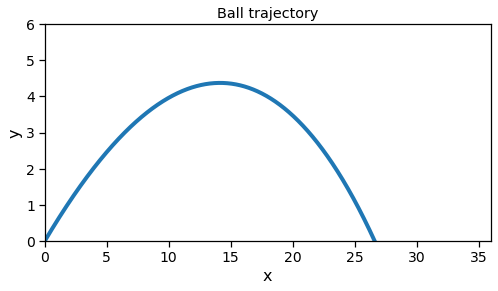

In [12]:
plt.figure(figsize=(8, 4))
x3n = r[:, 0]
y3n = r[:, 1]
plt.plot(x3n, y3n, lw=4)
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### All numerical solutions plotted together

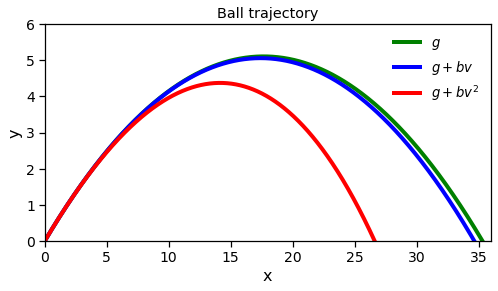

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(x1n, y1n, lw=4, c='g', label='$g$')
plt.plot(x2n, y2n, lw=4, c='b', label='$g+bv$')
plt.plot(x3n, y3n, lw=4, c='r', label='$g+bv^2$')
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', frameon=False)
plt.show()

## Further reading

- Read chapter 0, What is mechanics, from Ruina and Rudra's book.  
- Read pages 478-494 in chapter 10, Dynamics in 1D, from Ruina and Rudra's book.  
- Read chapter 13 from Hibbeler's book.

## Video lectures on the internet

- Khan Academy: [Forces and Newton's laws of motion](https://www.khanacademy.org/science/ap-physics-1/ap-forces-newtons-laws) ([Forças e as Leis do Movimento de Newton](https://pt.khanacademy.org/science/physics/forces-newtons-laws))  

## Problems

1. Solve exercises 12.1.16, 12.1.19, 12.1.24, 12.1.29, 12.1.30, 12.1.31(a, b, d) and 12.1.32 from Ruina and Pratap's book (2019).  
2. Consider a block with mass of 1 kg attached to a spring hanging from a ceiling (the spring constant k=100 N/m). At t=0 s, the spring is stretched by 0.1 m from the equilibrium position of the block+spring system and then it's released (the initial velocity is not specified). Find the motion of the block.  

## References

- Hibbeler (2010) Engineering Mechanics: Dynamics. 12th edition. (Hibbeler (2011) Dinâmica: Mecânica para Engenharia. 12a edição).
- Ruina A, Rudra P (2019) [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press.  
- Taylor JR (2005) [Classical Mechanics](https://books.google.com.br/books?id=P1kCtNr-pJsC). University Science Books.